<a href="https://colab.research.google.com/github/injoon-pij/pytorch-learning/blob/master/pytorch_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) What is CNN : Convolution and Pooling

* 합성곱 신경망(Convolutional Neural Network)은 크게 합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성됨
* __데이터의 형상이 무시__된다는 다층 퍼셉트론의 한계와 달리 데이터의 형상을 고려하며 학습할 수 있는 방식
 * 이미지 처리의 예로, 이미지를 다층 퍼셉트론의 입력으로 사용하려면 이미지를 1차원 텐서인 벡터로 변환해야 하는데, 그러면 그 벡터는 __해당 이미지가 가지는 고유한 공간적 구조 정보가 유실된 상태__가 됨
 * 공간적인 구조 정보라는 것은 픽셀 간 거리에 따른 연관성, RGB 채널 간 관계 등 3차원 속에서 의미를 가지는 본질적인 패턴을 뜻함

## 1.1 Channel

* 이미지는 __(높이, 너비, 채널)__ 이라는 3차원 텐서
 * 높이 : 이미지의 세로 방향 픽셀 수
 * 너비 : 이미지의 가로 방향 픽셀 수
 * 채널 : 색 성분
   * 흑백 이미지 : 채널 수 1, 각 픽셀은 0부터 255 사이의 값
   * 컬러 이미지 : 채널 수 3(RGB), 각 픽셀은 0부터 255 사이의 값

[흑백 이미지] =>  (28 × 28 × 1)의 크기를 가지는 3차원 텐서

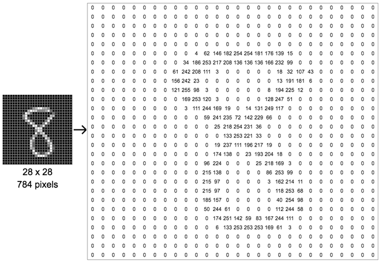

[컬러 이미지] =>  (28 × 28 × 3)의 크기를 가지는 3차원 텐서

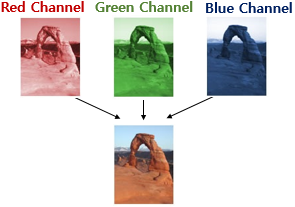

## 1.2 Convolution operation

합성곱층은 합성곱 연산을 통해서 이미지의 특징을 추출하는 역할
* 합성곱 : 커널(kernel) 또는 필터(filter)라고 불리는 행렬로 이미지의 가장 왼쪽 위부터 가장 오른쪽까지 순차적으로 훑고 지나가면서, 겹쳐지는 부분의 각 이미지와 커널의 원소의 값을 곱해서 모두 더한 값을 출력으로 하는 것
* 커널(필터) : 일반적으로 크기가 3 × 3 또는 5 × 5인 행렬을 사용
* 스트라이드(stride) : 커널의 이동 범위
* 특성 맵(feature map) : 커널을 사용하여 합성곱 연산을 통해 나온 결과

---

아래의 그림들은  3 × 3 크기의 커널로  5 × 5 이미지 행렬에 합성곱 연산(스트라이드 = 1)을 수행하는 과정을 시각화하였음 

__[첫번째 스텝]__

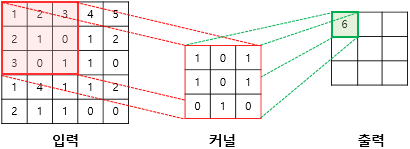

__[두번째 스텝]__

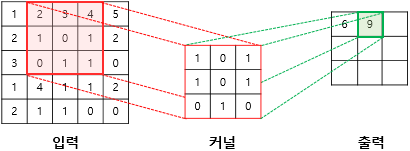

__[세번째 스텝]__

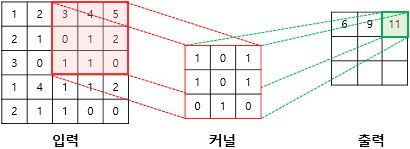

__[네번째 스텝]__

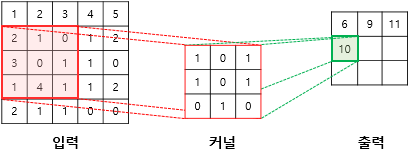

__[아홉번째 스텝까지 마쳤을 때의 결과]__

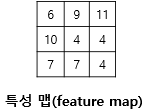

---

아래의 그림들은  3 × 3 크기의 커널로  5 × 5 이미지 행렬에 합성곱 연산(스트라이드 = 2)을 수행하는 과정을 시각화하였음
 * 특성맵 사이즈 = 2 × 2

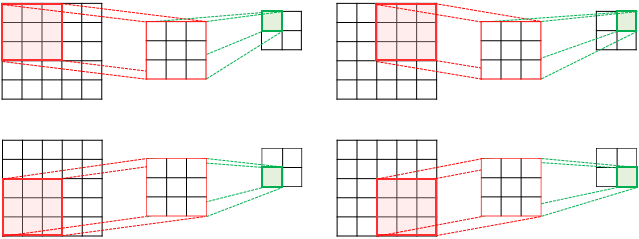

## 1.3 Padding

합성곱 연산의 결과로 얻은 특성 맵은 입력보다 크기가 작아진다는 특징이 있어 만약 합성곱 층을 여러개 쌓았다면 최종적으로 얻은 특성 맵은 초기 입력보다 매우 작아진 상태가 되버림.

이에 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하려면 __패딩(padding)__을 사용함

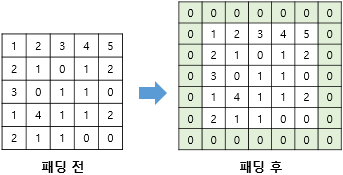

* 주로 값을 0으로 채우는 제로 패딩(zero padding)을 사용
* 위 그림의 경우 3 × 3 크기의 커널을 사용한다면 특성 맵의 크기가 입력 이미지의 크기와 동일하게 유지됨
 * 5 × 5 크기의 커널을 사용한다면 폭을 하나 더 추가해야 유지됨

## 1.4 Weight and Bias

[다층 퍼셉트론] (비교)
* 가중치 수 :  9 × 4 = 36

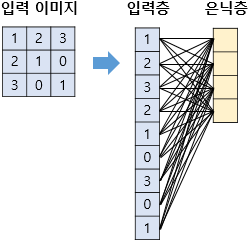

[합성곱 신경망]
* 가중치 수 : 4
* 편향 : 편향은 하나의 값만 존재하며, 이미지에 커널을 적용한 결과의 모든 원소에 더해짐(브로드캐스팅)

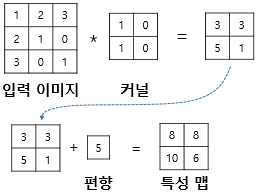

---

* 동일한 이미지를 처리한다고 가정했을 때, 합성곱 신경망은 __다층 퍼셉트론보다 훨씬 적은 수의 가중치를 사용__하며 공간적 구조 정보를 보존한다는 특징이 있음
* 합성곱 연산을 통해 얻은 특성 맵은 다층 퍼셉트론때와 마찬가지로 비선형성 추가를 위해서 활성화 함수를 지나게 됨
 * 활성화 함수는 ReLU 함수나 ReLU 함수의 변형들을 주로 사용
 * 합성곱 연산을 통해서 특성 맵을 얻고, 활성화 함수를 지나는 연산을 하는 합성곱 신경망의 은닉층을 합성곱 신경망에서는 __합성곱 층(convolution layer)__이라 함

## 1.5 Feature map size

[특성 맵 크기 계산 식]

$$O_{h} = floor(\frac{I_{h} - K_{h} + 2P}{S}+1)$$
$$O_{w} = floor(\frac{I_{w} - K_{w} + 2P}{S}+1)$$

* $I_{h}$ : 입력의 높이
* $I_{w}$ : 입력의 너비
* $K_{h}$ : 커널의 높이
* $K_{w}$ : 커널의 너비
* $S$ : 스트라이드
* $O_{h}$ : 특성 맵의 높이
* $O_{w}$ : 특성 맵의 너비
* $P$ : 패딩의 폭 (없으면 0)
* $floor()$ : 소수점 발생 시 소수점 이하를 버림

## 1.6 Convolution operation of three dimensional tensor

이미지의 채널(깊이)를 고려한 합성곱 연산
* 커널의 채널 수가 입력 데이터의 채널 수와 같아야 하고 커널의 각 채널의 크기는 같아야 함
* 합성곱 연산을 채널마다 수행하고, 그 결과를 모두 더하여 최종 특성 맵을 구함

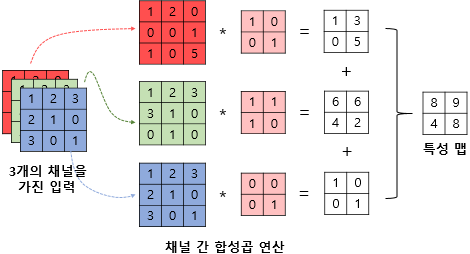

* 위의 연산에서 사용되는 커널은 3개의 커널이 아니라 3개의 채널을 가진 1개의 커널임

---

3차원 텐서의 합성곱 연산을 시각화하면 아래와 같음

[커널 1개 사용]

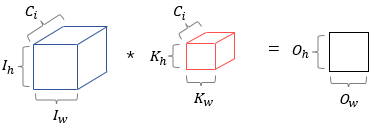

[커널 여러개 사용]

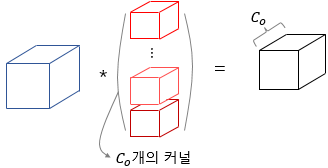

* $I_{h}$ : 입력의 높이
* $I_{w}$ : 입력의 너비
* $K_{h}$ : 커널의 높이
* $K_{w}$ : 커널의 너비
* $O_{h}$ : 특성 맵의 높이
* $O_{w}$ : 특성 맵의 너비
* $C_{i}$ : 입력 데이터의 채널(= 커널의 채널)
* $C_{o}$ : 커널의 수


## 1.7 Pooling

일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가
 * 풀링 층 : 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산 진행
 * 풀링 연산 : 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 사용됩
 * 학습해야 할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점에서 합성곱 연산과 다름

[최대 풀링 시각화]

* 스트라이드가 2일 때, 2 x 2 크기 커널로 특성 맵을 맥스 풀링 연산한 결과

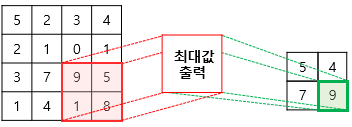

# 2) MNIST Data Classification by CNN

## 2.1 CNN 모델 이해

* 합성곱(nn.Conv2d) + 활성화 함수(nn.ReLU) + 맥스풀링(nn.MaxPoold2d)을 하나의 합성곱 층으로 보기로 가정
 * 합성곱(nn.Cov2d) + 활성화 함수(nn.ReLU)를 하나의 합성곱 층으로 보고, 맥스풀링(nn.MaxPoold2d)은 풀링 층으로 별도로 명명하기도 함

```python
# model architecture

# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 7 × 7 × 64 → batch_size × 3136
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

## 2.2 CNN 모델 구현

In [1]:
import torch
import torch.nn as nn

# 임의의 텐서 선언
# 배치 크기 x 채널 수 x 높이 x 너비
inputs = torch.Tensor(1, 1, 28, 28)
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 1, 28, 28])


### 2.2.1 합성곱층과 풀링층 선언

* __nn.Conv2d()__에서 stride와 padding 매개변수의 기본값은 각각 __stride = 1, padding = 0__
* __nn.MaxPool2d__에서 stride와 padding 매개변수의 기본값은 각각 __stride = kernel_size, padding = 0__

In [ ]:
# Layer 1 : Convolutional Layer
conv1 = nn.Conv2d(1, 32, 3, padding=1) 
print(conv1)

# Layer 2 : Convolutional Layer
conv2 = nn.Conv2d(32, 64, 3, padding=1)
print(conv2)

# Max Pooling Layer
pool = nn.MaxPool2d(2)
print(pool)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


### 2.2.2 구현체 연결하여 모델 구성

In [ ]:
# Layer 1
out = conv1(inputs)
print(out.shape)
out = pool(out)
print(out.shape)

# Layer 2
out = conv2(out)
print(out.shape)
out = pool(out)
print(out.shape)

# Layer 3
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 합침(평탄화(Flatten))
out = out.view(out.size(0), -1) # out.shape[0]
print(out.shape)
fc = nn.Linear(3136, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])
torch.Size([1, 3136])
torch.Size([1, 10])


## 2.3 MNIST Classification

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)

# GPU 사용 가능일 경우
if device == 'cuda':
  torch.cuda.manual_seed(777)

In [4]:
# parameters
learning_rate = 0.001
training_epoch = 15
batch_size = 100

# torch.dataset
mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로
                          train = True, # 훈련 데이터로 다운로드
                          transform = transforms.ToTensor(), # 텐서로 변환
                          download = True)

mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로
                          train = False, # 테스트 데이터로 다운로드
                          transform = transforms.ToTensor(), # 텐서로 변환
                          download = True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
# Dataloader
data_loader = DataLoader(dataset=mnist_train,
                                 batch_size=batch_size,
                                 shuffle=True,
                                 drop_last=True)

In [6]:
# class로 모델 정의

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape = (?, 28, 28, 1) -> ?는 batch size
        # Conv   ->     (?, 28, 28, 32)
        # Pool   ->     (?, 14, 14, 32)
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape = (?, 14, 14, 32)
        # Conv   ->     (?, 14, 14, 64)
        # Pool   ->     (?, 7, 7, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7 x 7 x 64 inputs -> 10 outputs
        self.fc = nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # Flatten
        out = self.fc(out)
        return out

In [7]:
# model
model = CNN().to(device)
# cost function
criterion = nn.CrossEntropyLoss().to(device)
# optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [9]:
# train
for epoch in range(training_epoch):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내옴. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[Epoch:    1] cost = 0.225638643
[Epoch:    2] cost = 0.0630241856
[Epoch:    3] cost = 0.0462851562
[Epoch:    4] cost = 0.0374466665
[Epoch:    5] cost = 0.0314616188
[Epoch:    6] cost = 0.0261270478
[Epoch:    7] cost = 0.0219386742
[Epoch:    8] cost = 0.0184466876
[Epoch:    9] cost = 0.0165075548
[Epoch:   10] cost = 0.0135030029
[Epoch:   11] cost = 0.0103755686
[Epoch:   12] cost = 0.00947520789
[Epoch:   13] cost = 0.00858631078
[Epoch:   14] cost = 0.00681982981
[Epoch:   15] cost = 0.00774352159


In [10]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9853000044822693


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


---

위의 모델에서 층을 더 추가하면 모델의 성능이 좋아질지 테스트해보자

```python
# model architecture

# 1번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 1, out_channel = 32, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 2번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 32, out_channel = 64, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2))

# 3번 레이어 : 합성곱층(Convolutional layer)
합성곱(in_channel = 64, out_channel = 128, kernel_size=3, stride=1, padding=1) + 활성화 함수 ReLU
맥스풀링(kernel_size=2, stride=2, padding=1))

# 4번 레이어 : 전결합층(Fully-Connected layer)
특성맵을 펼친다. # batch_size × 4 × 4 × 128 → batch_size × 2048
전결합층(뉴런 625개) + 활성화 함수 ReLU

# 5번 레이어 : 전결합층(Fully-Connected layer)
전결합층(뉴런 10개) + 활성화 함수 Softmax
```

In [11]:
# 새로운 class
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5 # 드롭아웃 비율
        # 첫번째층
        # ImgIn shape = (?, 28, 28, 1) -> ?는 batch size
        # Conv   ->     (?, 28, 28, 32)
        # Pool   ->     (?, 14, 14, 32)
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 두번째층
        # ImgIn shape = (?, 14, 14, 32)
        # Conv   ->     (?, 14, 14, 64)
        # Pool   ->     (?, 7, 7, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # 세번째층
        # ImgIn shape = (?, 7, 7, 64)
        # Conv   ->     (?, 7, 7, 128)
        # Pool   ->     (?, 4, 4, 128)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # 네번째층
        # 전결합층 4 x 4 x 128 inputs -> 625 outputs
        self.fc1 = nn.Linear(4 * 4 * 128, 625, bias=True)
        nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = nn.Sequential(
            self.fc1,
            nn.ReLU(),
            nn.Dropout(p = 1 - self.keep_prob))
        
        # 다섯번째층
        # 전결합층 625 inputs -> 10 outputs
        self.fc2 = nn.Linear(625, 10, bias=True)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1) # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [12]:
# model
model = CNN().to(device)
# cost function
criterion = nn.CrossEntropyLoss().to(device)
# optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# train
for epoch in range(training_epoch):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

[Epoch:    1] cost = 0.189674243
[Epoch:    2] cost = 0.0483664051
[Epoch:    3] cost = 0.0353653431
[Epoch:    4] cost = 0.026381081
[Epoch:    5] cost = 0.0224643592
[Epoch:    6] cost = 0.0189015828
[Epoch:    7] cost = 0.015909452
[Epoch:    8] cost = 0.0137506286
[Epoch:    9] cost = 0.0122112874
[Epoch:   10] cost = 0.0102229416
[Epoch:   11] cost = 0.0113168033
[Epoch:   12] cost = 0.00925709866
[Epoch:   13] cost = 0.00842656102
[Epoch:   14] cost = 0.00666459231
[Epoch:   15] cost = 0.00709710829


In [13]:
# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9821999669075012


층을 더 깊게 쌓았지만, 정확도가 더 올라가진 않았음

결국 층을 깊게 쌓는 것도 중요하지만, 꼭 깊게 쌓는 것이 정확도를 올려주지는 않으며 __효율적으로 쌓는 것이 중요함__